# Initial Exploratory/Scoping of SFCompo Data and Learning Opportunities

In [1]:
# import statements
# standard
import numpy as np
import pandas as pd

# visualization
import matplotlib.pyplot as plt
import seaborn as sns

# custom
import Nuclide as NN
import sfcompo as sfc

Running Tests of SFCompo Module
	Tests of function getUnit() passed.
	Tests of function extractUnits() passed.
All tests passed.


In [2]:
# Load data using SFCompo module tools
sfc.setDataPath('/Users/ao0/sfcompo/sfcompo_data')
X, U, cF = sfc.load()

In [3]:
# Conversion Factor Table
cF

{'GW*d/tHMi': {'MW*d/tUi': 1000.0},
 'GW*d/tUi': {'MW*d/tUi': 1000.0},
 'MW*d/kgUi': {'MW*d/tUi': 1000.0},
 'MW*d/tHMi': {'MW*d/tUi': 1.0},
 'MW*d/tUi': {'MW*d/kgUi': 0.001, 'MW*d/tUi': 1.0},
 'MW*h/kgUi': {'MW*d/tUi': 41.66666667},
 'Pa': {'bar': 1e-05, 'psi': 0.000145038},
 'bar': {'Pa': 100000.0, 'psi': 14.5038},
 'cm': {'in': 0.393701, 'm': 0.01, 'mm': 10.0},
 'g': {'kg': 0.001, 'lb': 0.00220462, 'mg': 1000.0},
 'in': {'cm': 2.54, 'm': 0.0254, 'mm': 25.4},
 'kg': {'g': 1000.0, 'lb': 2.20462, 'mg': 1000000.0},
 'lb': {'g': 453.592, 'kg': 0.453592, 'mg': 453592.0},
 'm': {'cm': 100.0, 'in': 39.3701, 'mm': 1000.0},
 'mg': {'g': 0.001, 'kg': 1e-06, 'lb': 2.20462e-06},
 'mm': {'cm': 0.1, 'in': 0.0393701, 'm': 0.001},
 'psi': {'Pa': 689476.0, 'bar': 0.0689476}}

In [4]:
U.shape

(24219, 184)

In [5]:
X.head(10)

,A,Absorber material,Absorber rod cladding inner diameter,Absorber rod cladding material,Absorber rod cladding outside diameter,Absorber rod pellet diameter,Absorber rod type,Active core diameter,Active core height,Active length,...,Water wing internal thickness,Water wing wall density,Water wing wall material,Water wing wall temperature,Water wing wall thickness,Wide water gap,Z,e. Pu,e. Pu239 + Pu241,e. U235
SFCompo sample ref,,,,,,,,,,,,,,,,,,,,,
BAL-2|1476|42|15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.16,3.53,3530.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.4
BAL-2|1476|42|15,241.0,NaN,NaN,NaN,NaN,NaN,NaN,3.16,3.53,3530.0,...,NaN,NaN,NaN,NaN,NaN,NaN,95.0,NaN,NaN,4.4
BAL-2|1476|42|15,243.0,NaN,NaN,NaN,NaN,NaN,NaN,3.16,3.53,3530.0,...,NaN,NaN,NaN,NaN,NaN,NaN,95.0,NaN,NaN,4.4
BAL-2|1476|42|15,242.0,NaN,NaN,NaN,NaN,NaN,NaN,3.16,3.53,3530.0,...,NaN,NaN,NaN,NaN,NaN,NaN,96.0,NaN,NaN,4.4
BAL-2|1476|42|15,244.0,NaN,NaN,NaN,NaN,NaN,NaN,3.16,3.53,3530.0,...,NaN,NaN,NaN,NaN,NaN,NaN,96.0,NaN,NaN,4.4
BAL-2|1476|42|15,142.0,NaN,NaN,NaN,NaN,NaN,NaN,3.16,3.53,3530.0,...,NaN,NaN,NaN,NaN,NaN,NaN,60.0,NaN,NaN,4.4
BAL-2|1476|42|15,143.0,NaN,NaN,NaN,NaN,NaN,NaN,3.16,3.53,3530.0,...,NaN,NaN,NaN,NaN,NaN,NaN,60.0,NaN,NaN,4.4
BAL-2|1476|42|15,144.0,NaN,NaN,NaN,NaN,NaN,NaN,3.16,3.53,3530.0,...,NaN,NaN,NaN,NaN,NaN,NaN,60.0,NaN,NaN,4.4
BAL-2|1476|42|15,145.0,NaN,NaN,NaN,NaN,NaN,NaN,3.16,3.53,3530.0,...,NaN,NaN,NaN,NaN,NaN,NaN,60.0,NaN,NaN,4.4


## Testing Old SFCompo Functionality

In [4]:
# Test Functions from Original Notebook & Scrub
# Get unique entries for Reactors (on which inlet temperature depends)
# With this construction (subset designation), if diff assemblies from one reactor
# had unique temperature values, these would be represented
Xtmp = X.drop_duplicates(subset=['Coolant inlet temperature', 'Coolant outlet temperature']).reset_index()

In [5]:
# There are few entries that were just hyphens. These are replaced with np.nan
def f(x):
    if x == '-':
        return np.nan
    else:
        return x
X = X.applymap(f)

In [6]:
Xtmp[['Reactor name','Reactor type','Coolant inlet temperature','Coolant outlet temperature']]


,Reactor name,Reactor type,Coolant inlet temperature,Coolant outlet temperature
0,Balakovo-2,VVER-1000,290,322
1,Beznau-1,PWR,283.8,316.9
2,Bradwell-1,MAGNOX,453,663
3,Bruce-1,CANDU,522,573
4,Calvert Cliffs-1,PWR,557,585
5,Cooper-1,BWR,459,558
6,Dodewaard-1,BWR,289,NaN
7,Forsmark-3,BWR,278,286
8,Fukushima-Daiichi-3,BWR,196,286
9,Fukushima-Daini-2,BWR,216,286


In [7]:
def calc_temp_change(row):
    try:
        diff = row['Coolant outlet temperature'] - row['Coolant inlet temperature']
    except:
        diff = np.nan
    return diff

# We specify axis=1 in the apply call to apply 'calc_temp_change' to each row (axis=0 -> apply to each column)
Xtmp['Coolant temperature change'] = Xtmp.apply(calc_temp_change,axis=1)

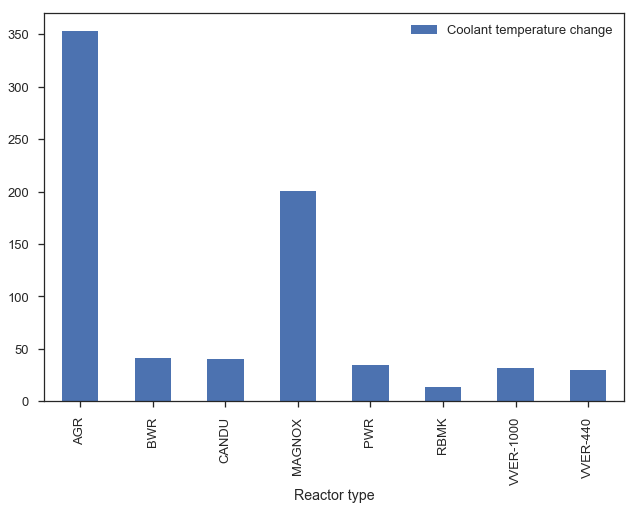

In [8]:
# Do a groupby and plot
sns.set_context('talk')
sns.set_style('ticks')
Xtmp[['Reactor name','Reactor type','Coolant inlet temperature','Coolant outlet temperature','Coolant temperature change']].groupby('Reactor type').mean().plot(kind='bar')
plt.show()

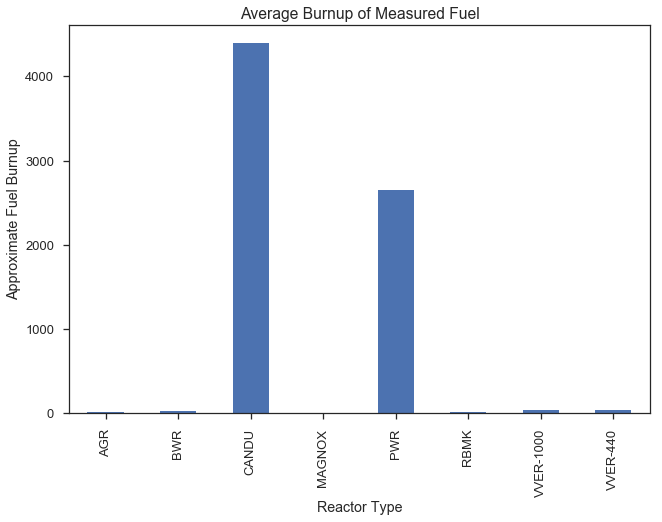

In [23]:
# There are more measurements of some reactors than others, and this will skew statistics
# First, reduce the data to one row per rod since the burnup is not specific to individual measurements in the data
X_unique_rods = X.drop_duplicates(subset=['Reactor name','Estimated burnup'])

# Group the data together by reactor type, compute the mean of the burnup entry and create a bar chart
Y = sfc.changeUnits(X_unique_rods, 'Estimated burnup','MW*d/tUi', U, cF)['Estimated burnup']
X_unique_rods.groupby('Reactor type')['Estimated burnup'].mean().plot(kind='bar')
plt.title('Average Burnup of Measured Fuel')
plt.xlabel('Reactor Type')
plt.ylabel('Approximate Fuel Burnup')
plt.show()

Ack! What's happening? Clearly the CANDU and PWR groups have some entries with a different unit.

We'll use the (new) conversion factor table to fix this and replot

In [24]:
X_unique_rods[X_unique_rods['Reactor type'] == 'CANDU']['Estimated burnup']

SFCompo sample ref
BRU-1|F21037C|1|1         7.8
NPD-1|1016|1|1            5.3
NPD-1|1016|2|1            5.6
NPD-1|1016|3|1            6.6
NPD-1|1022|A|1          791.0
NPD-1|1022|B|1          854.0
NPD-1|1022|C|1         1059.0
NPD-1|1052|A|1         6526.0
NPD-1|1052|B|1         6927.0
NPD-1|1052|C|1         8530.0
NPD-1|1092|A|1         7642.0
NPD-1|1092|B|1         8050.0
NPD-1|1092|C|1         9800.0
NPD-1|1096|A|1         5337.0
NPD-1|1096|B|1         5976.0
NPD-1|1096|C|1         6828.0
NPD-1|1129|A|1         1223.0
NPD-1|1129|B|1         1306.0
NPD-1|1129|C|1         1622.0
NPD-1|1630|A|1         2733.0
NPD-1|1630|C|1         3550.0
NPD-1|922|A|1          3809.0
NPD-1|922|B|1          4453.0
NPD-1|922|C|1          5372.0
NPD-1|955|A|1          9224.0
NPD-1|955|B|1          9632.0
NPD-1|955|C|1         11501.0
PIK-1|PA19558C|7|1      221.0
Name: Estimated burnup, dtype: float64

In [54]:
Z = sfc.changeUnits(X_unique_rods, 'Estimated burnup','MW*d/tUi', U, cF)

In [57]:
Z.loc['PIK-1|PA19558C|7|1']

Estimated burnup    221000.0
Name: PIK-1|PA19558C|7|1, dtype: float64

#something weird going on with unit conversions... are the units in the matrix U correct? did the conversion happen incorrectly?

In [53]:
cF['MW*h/kgUi']['MW*d/tUi']

41.66666667

In [38]:
X.columns.get_loc('Estimated burnup')

84

In [44]:
idx = np.where(X.index.get_loc('PIK-1|PA19558C|7|1'))[0]

In [60]:
cF[U[idx,84][0]]['MW*d/tUi']

41.66666667

In [48]:
1000./24

41.666666666666664

In [49]:
221.*41.6667

9208.340699999999

# SCRATCH

In [36]:
def getAssayData(X):
    '''
    Given a subset of the SFCompo database, finds all available assay data
    return a cleaned, homogenized dataFrame copy and associate numpy nd.array
    '''
    # make copy to manipulate
    tmp = X.copy()
    # remove metadata
    tmp = tmp[['Concentration', 'Concentration Unit', 'Estimated burnup', 
               'Fuel type', 'Item', 'Measurement type', 'Reactor name',
               'Sigma', 'Uncertainty', 'Unit', 'Value', 'e. Pu', 
               'e. Pu239 + Pu241', 'e. U235']]
    # drop rows that have invalid Concentration entry
    tmp = tmp[np.isnan(tmp.Concentration) == False]
    # remove U or Pu enrichment data
    if np.sum(np.isnan(tmp['e. U235'])) > 0:
        
    elif np.sum(np.isnan(tmp['e. Pu'])) > 0:

    else:
        raise WeirdDataException('There is a combination of Pu-based and U-based fuel in the given data: Outside designed function scope')
    return tmp

In [37]:
tmp = getAssayData(X[(X['Reactor type']=='PWR')&(X['Fuel type'] == 'UO2')])